# Regresión logística

Importamos el dataset

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
(data_train, labels_train), (data_test, labels_test) = cifar10.load_data()
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

SVD

In [2]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
data_train_mean = np.mean(data_train, axis=0)
data_train_mean_normalized = data_train - data_train_mean
data_test_mean_normalized = data_test - data_train_mean
data_train_reshaped = data_train_mean_normalized.reshape(data_train_mean_normalized.shape[0], -1)
data_test_reshaped = data_test_mean_normalized.reshape(data_test_mean_normalized.shape[0], -1)
svd = TruncatedSVD(n_components=50)
Xr_train = svd.fit_transform(data_train_reshaped)
Xr_test = svd.transform(data_test_reshaped)

Tasa de acierto y tiempo de entrenamiento en función del número de componentes

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

K = 25
acc = np.empty(K)
trtimes = np.empty(K)
acc[0] = 0.0; trtimes[0] = 0.0

for k in np.arange(1, K):
    start_time = time.time()

    logistic_model = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial')
    logistic_model.fit(Xr_train[:, :k], labels_train.flatten())

    trtimes[k] = time.time() - start_time

    y_pred_logistic = logistic_model.predict(Xr_test[:, :k])
    acc[k] = accuracy_score(labels_test, y_pred_logistic) * 100

Gráfica precisión respecto al número de componentes

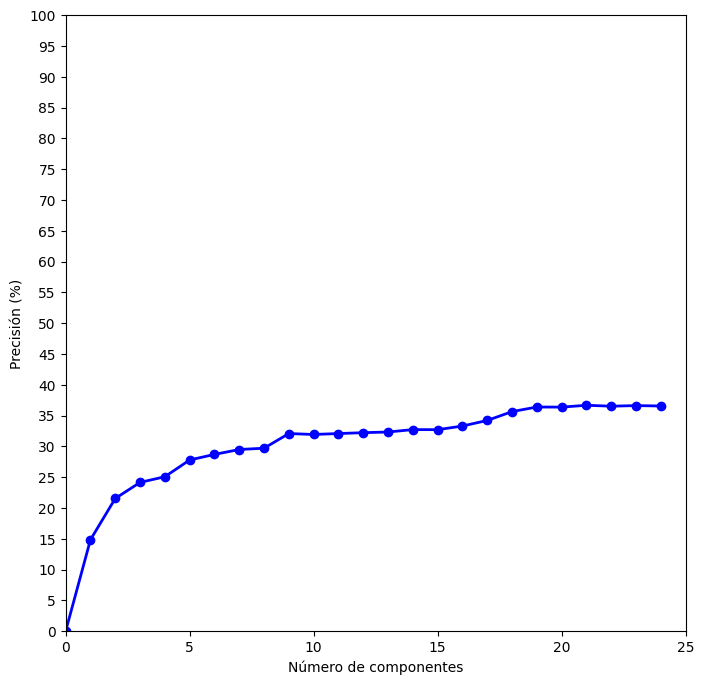

In [8]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 8))
plt.axis([0, K, 0, 100])
plt.plot(acc, '-bo', linewidth=2)
plt.xlabel('Número de componentes')
plt.ylabel('Precisión (%)')
plt.xticks(np.arange(0, K+1, 5))
plt.yticks(np.arange(0, 101, 5))
plt.show()

Gráfica tiempo de entrenamiento respecto al número de componentes

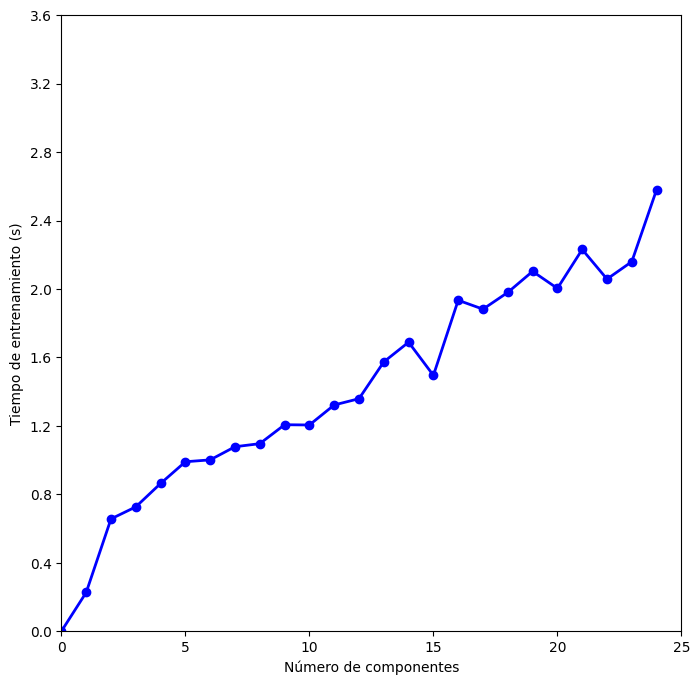

In [9]:
import math

plt.figure(1, figsize=(8, 8))
plt.axis([0, K, 0, math.ceil(np.max(trtimes))])
plt.plot(trtimes, '-bo', linewidth=2)
plt.xlabel('Número de componentes')
plt.ylabel('Tiempo de entrenamiento (s)')
plt.xticks(np.arange(0, K+1, 5))
plt.yticks(np.arange(0, math.ceil(np.max(trtimes) + 1), math.ceil(np.max(trtimes) + 1) / 10))
plt.show()

Elección de una complejidad dimensional

In [6]:
acc_increments = [acc[i] - acc[i-1] for i in range(1, K)]
acc_increments = [math.inf if i < 0 else i for i in acc_increments]
threshold = 1.0
elbow_point = next(i for i, v in enumerate(acc_increments) if v < threshold)
print(f"Punto de codo en {elbow_point + 1} componentes.")

Punto de codo en 4 componentes.


Matriz de confusión detallada

c:\MUIARFID\RFA\rfa_projects\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


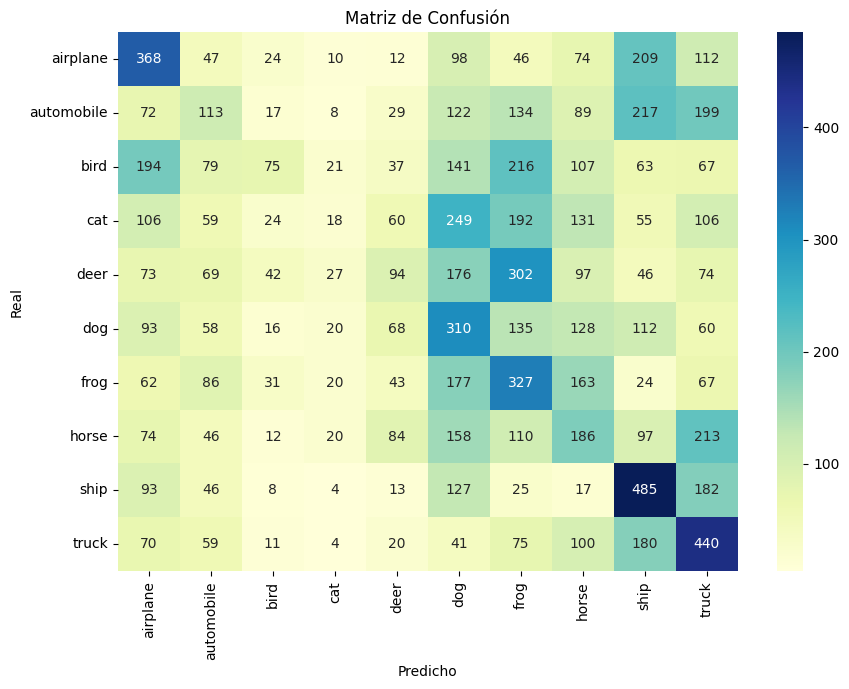

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

logistic_model = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial')
logistic_model.fit(Xr_train[:, :elbow_point], labels_train)
y_pred_elbow = logistic_model.predict(Xr_test[:, :elbow_point])
conf_matrix = confusion_matrix(labels_test, y_pred_elbow)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="g",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()